In [1]:
import numpy as np
np.random.seed(876552)

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Roboto Condensed']

## Load data

In [8]:
sc = pd.read_excel('../data/science-german.xlsx', engine='openpyxl')
sc['date work'] = sc['date work'].ffill()
sc.head(10)

,author,title,date work,signature,repository,date witness,fragmentary,subgenre
0,anonymous,Abor und das Meerweib,1301-1350,"Kopenhagen, Königl. Bibl., NKS Cod. 4843,4°","Kopenhagen, Königl. Bibl.",1301-1350,True,arthurian
1,Albrecht von Kemenaten,Goldemar,1201-1250,"Nürnberg, Germanisches Nationalmuseum, Bibliot...","Nürnberg, Germanisches Nationalmuseum",1355-1357,False,other
2,anonymous,Alpharts Tod,1251-1300,"Berlin, Staatsbibl., mgf 856; Darmstadt, Unive...","Berlin, Staatsbibl. ; Darmstadt, Universitäts-...",1449-1480,False,other
3,anonymous,Bairisch-österreichisches Buch von Troja (früh...,1301-1400,"Berlin, Staatsbibl., mgq 1145","Berlin, Staatsbibl.",1426-1475,False,other
4,anonymous,Bairisch-österreichisches Buch von Troja (früh...,1301-1400,"Klagenfurt, Landesarchiv, Arnoldstein, Kloster...","Klagenfurt, Landesarchiv",1452-1500,False,other
5,anonymous,Bairisch-österreichisches Buch von Troja (früh...,1301-1400,"Leipzig, Universitätsbibl., Ms. 1711a","Leipzig, Universitätsbibl.",1455,True,other
6,anonymous,Bairisch-österreichisches Buch von Troja (früh...,1301-1400,"Leutkirch, Fürstl. Waldburg zu Zeil und Trauch...","Leutkirch, Fürstl. Waldburg zu Zeil und Trauch...",1464,False,other
7,anonymous,Bairisch-österreichisches Buch von Troja (früh...,1301-1400,"Lüneburg, Ratsbücherei, Ms. Hist. C 2° 37","Lüneburg, Ratsbücherei",1466,False,other
8,anonymous,Bairisch-österreichisches Buch von Troja (früh...,1301-1400,"Prag, Nationalbibl., Cod. I.B.6","Prag, Nationalbibl.",1401-1500,False,other
9,anonymous,Bairisch-österreichisches Buch von Troja (früh...,1301-1400,"Wien, Österr. Nationalbibl., Cod. 2802","Wien, Österr. Nationalbibl.",1451-1500,False,other


Now the shortlist data:

In [9]:
canons = pd.read_excel('../data/german-canons.xlsx', engine='openpyxl')
canons = canons[['Source Author', 'Source Work', 'Referenced Author (standardized)']]
canons.columns = ['src-author', 'src-work', 'trg-author']
canons['canon'] = canons['src-author'] + ': ' + canons['src-work']
canons.sample(10)

,src-author,src-work,trg-author,canon
189,Ottokar,Österreichische Reimchronik,Frauenlob,Ottokar: Österreichische Reimchronik
178,anonymous,Der Heller der armen Frau,Gottfried von Neifen,anonymous: Der Heller der armen Frau
23,Gottfried von Straßburg,Tristan und Isold,Heinrich von Veldeke,Gottfried von Straßburg: Tristan und Isold
134,Konrad von Würzburg,Die goldene Schmiede,Gottfried von Straßburg,Konrad von Würzburg: Die goldene Schmiede
84,Hugo von Trimberg,Der Renner,Persius,Hugo von Trimberg: Der Renner
48,Rudolf von Ems,Alexander,Wetzel,Rudolf von Ems: Alexander
157,Wolfram von Eschenbach,Willehalm,Walther von der Vogelweide,Wolfram von Eschenbach: Willehalm
109,Hartman der Damen,Ich sitze tiefe in sorgen wage,Walther von der Vogelweide,Hartman der Damen: Ich sitze tiefe in sorgen wage
78,Hugo von Trimberg,Der Renner,Marner,Hugo von Trimberg: Der Renner
163,Reinbot von Durne,Der heilige Georg,Wolfram von Eschenbach,Reinbot von Durne: Der heilige Georg


/var/folders/6j/pn9nz6b55j3fpdt8gtj50crm0000gn/T/ipykernel_34525/1231825113.py:69: UserWarning: Glyph 8594 (\N{RIGHTWARDS ARROW}) missing from font(s) Roboto Condensed.
  plt.tight_layout()
/var/folders/6j/pn9nz6b55j3fpdt8gtj50crm0000gn/T/ipykernel_34525/1231825113.py:70: UserWarning: Glyph 8594 (\N{RIGHTWARDS ARROW}) missing from font(s) Roboto Condensed.
  plt.savefig('../figures/author_reference_network.png', dpi=300, bbox_inches='tight',
/Users/mikekestemont/miniconda3/envs/bayes/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8594 (\N{RIGHTWARDS ARROW}) missing from font(s) Roboto Condensed.
  fig.canvas.print_figure(bytes_io, **kw)


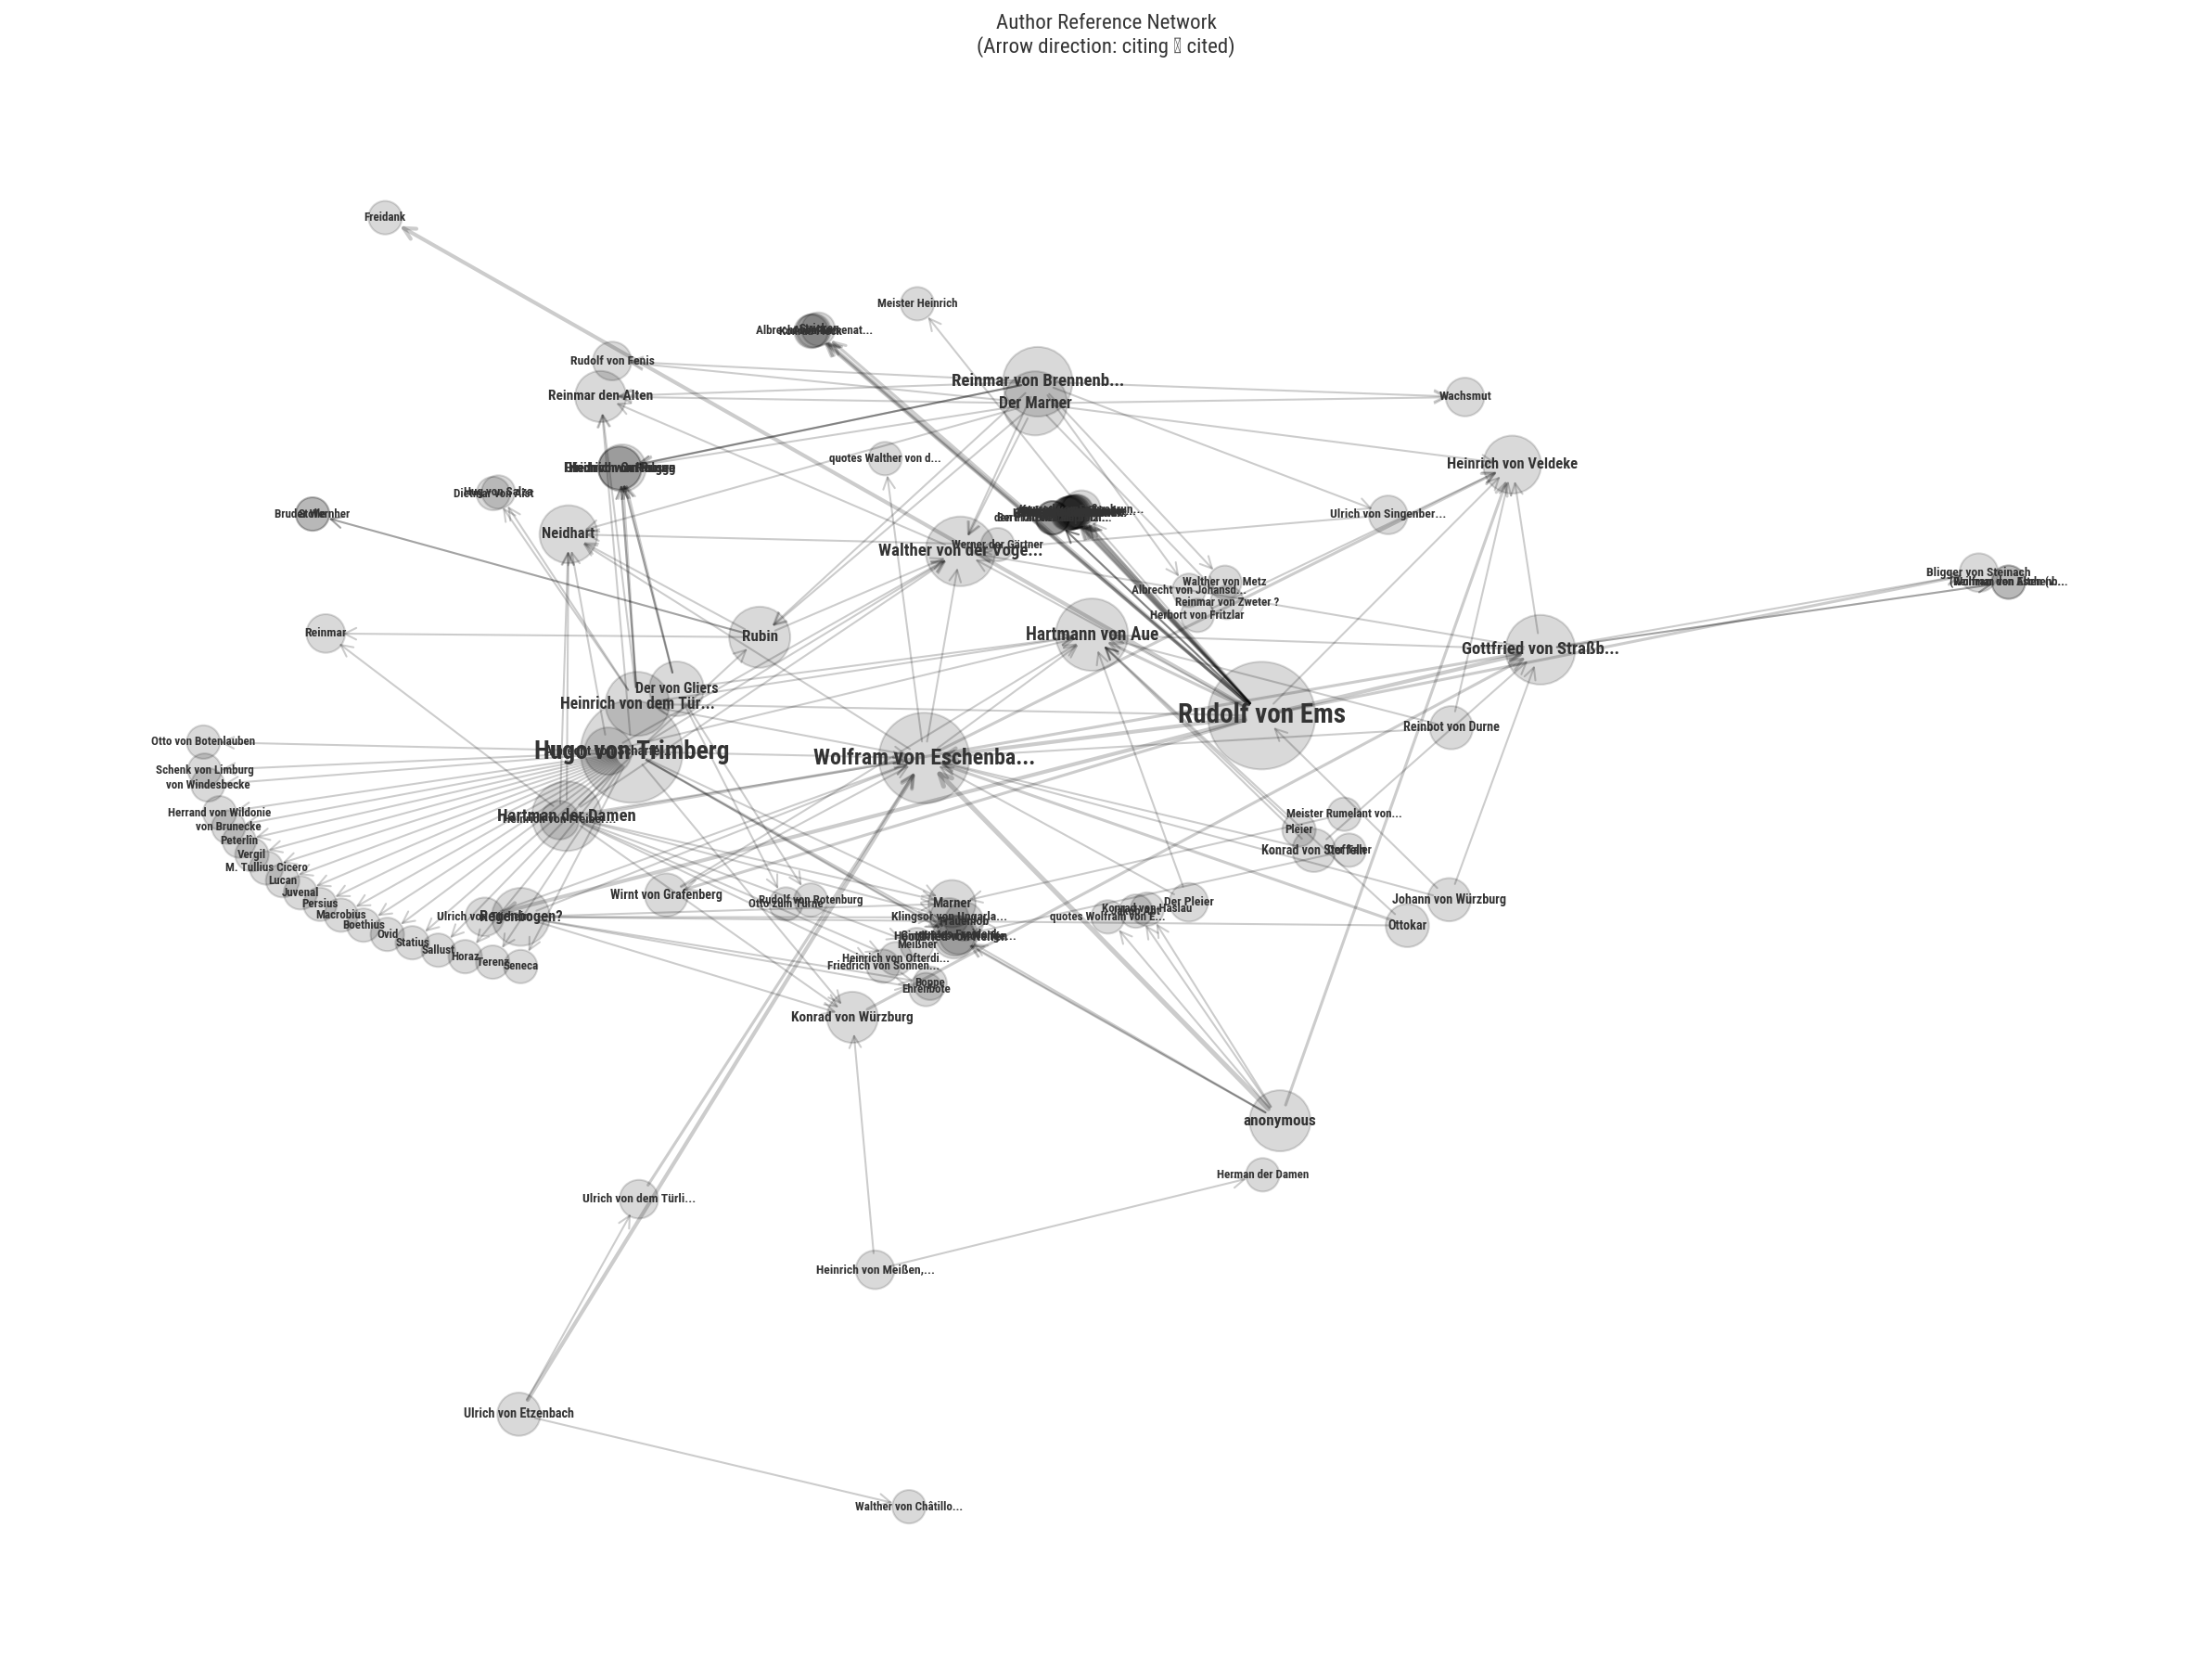

Network Statistics:
Number of authors: 110
Number of references: 168
Network density: 0.014

Most cited authors:
  Wolfram von Eschenbach: 15 citations
  Hartmann von Aue: 12 citations
  Walther von der Vogelweide: 10 citations
  Neidhart: 7 citations
  Heinrich von Veldeke: 7 citations

Most active citing authors:
  Rudolf von Ems: cites 28 others
  Hugo von Trimberg: cites 26 others
  Reinmar von Brennenberg: cites 11 others
  Hartman der Damen: cites 11 others
  Der Marner: cites 9 others


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

G = nx.DiGraph()

for _, row in canons.iterrows():
    src = row['src-author']
    trg = row['trg-author']
    
    if G.has_edge(src, trg):
        G[src][trg]['weight'] += 1
    else:
        G.add_edge(src, trg, weight=1)

in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

fig, ax = plt.subplots(figsize=(16, 12), dpi=150)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

pos = nx.kamada_kawai_layout(G)

total_degree = {node: in_degree.get(node, 0) + out_degree.get(node, 0) for node in G.nodes()}
node_sizes = [total_degree[node] * 100 + 200 for node in G.nodes()]

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
edge_widths = [w * 0.5 + 0.5 for w in edge_weights]

grid_color = '#e0e0e0'
text_color = '#333333'
node_color = '#000000'
edge_color = '#000000'

nodes = nx.draw_networkx_nodes(G, pos, 
                              node_size=node_sizes,
                              node_color=node_color,
                              alpha=0.15,
                              ax=ax)

nx.draw_networkx_edges(G, pos,
                      width=edge_widths,
                      edge_color=edge_color,
                      alpha=0.2,
                      arrows=True,
                      arrowsize=15,
                      arrowstyle='->',
                      ax=ax)

for node in G.nodes():
    label = node[:20] + '...' if len(node) > 20 else node
    
    node_degree = total_degree[node]
    max_degree = max(total_degree.values()) if total_degree.values() else 1
    font_size = 6 + (node_degree / max_degree) * 8
    
    nx.draw_networkx_labels(G, pos, {node: label},
                           font_size=font_size,
                           font_color=text_color,
                           font_weight='bold',
                           ax=ax)

ax.set_title('Author Reference Network\n(Arrow direction: citing → cited)', 
             fontsize=11, color=text_color, pad=15, fontweight='normal')
ax.axis('off')

plt.tight_layout()
plt.savefig('../figures/author_reference_network.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

print(f"Network Statistics:")
print(f"Number of authors: {G.number_of_nodes()}")
print(f"Number of references: {G.number_of_edges()}")
print(f"Network density: {nx.density(G):.3f}")

most_cited = sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:5]
print(f"\nMost cited authors:")
for author, count in most_cited:
    print(f"  {author}: {count} citations")

most_citing = sorted(out_degree.items(), key=lambda x: x[1], reverse=True)[:5]
print(f"\nMost active citing authors:")
for author, count in most_citing:
    print(f"  {author}: cites {count} others")

In [11]:
citation_data = []

for node in G.nodes():
    in_deg = in_degree.get(node, 0)
    out_deg = out_degree.get(node, 0)
    total = in_deg + out_deg
    
    if total > 0:
        in_ratio = in_deg / total
        out_ratio = out_deg / total
    else:
        in_ratio = 0
        out_ratio = 0
    
    citation_data.append({
        'author': node,
        'citations_received': in_deg,
        'citations_given': out_deg,
        'total': total,
        'in_ratio': in_ratio,
        'out_ratio': out_ratio
    })

citation_df = pd.DataFrame(citation_data)

print("Authors who are often cited but rarely cite others:")
print("=" * 80)
cited_not_citing = citation_df[citation_df['citations_received'] >= 3].sort_values(
    by=['in_ratio', 'citations_received'], ascending=[False, False]
).head(10)
print(cited_not_citing[['author', 'citations_received', 'citations_given', 'in_ratio']].to_string(index=False))

print("\n\nAuthors who often cite others but are rarely cited back:")
print("=" * 80)
citing_not_cited = citation_df[citation_df['citations_given'] >= 3].sort_values(
    by=['out_ratio', 'citations_given'], ascending=[False, False]
).head(10)
print(citing_not_cited[['author', 'citations_received', 'citations_given', 'out_ratio']].to_string(index=False))

Authors who are often cited but rarely cite others:
                    author  citations_received  citations_given  in_ratio
          Hartmann von Aue                  12                0  1.000000
                  Neidhart                   7                0  1.000000
      Heinrich von Veldeke                   7                0  1.000000
         Reinmar den Alten                   5                0  1.000000
                    Marner                   4                0  1.000000
        Heinrich von Rugge                   4                0  1.000000
      Friedrich von Hausen                   3                0  1.000000
      Ulrich von Gutenburg                   3                0  1.000000
      Gottfried von Neifen                   3                0  1.000000
Walther von der Vogelweide                  10                1  0.909091


Authors who often cite others but are rarely cited back:
                   author  citations_received  citations_given  out_ratio
 

## Manuscript co-occurrence

Total: 168 works, 708 connections
Filtered (degree >= 4): 112 works, 642 connections


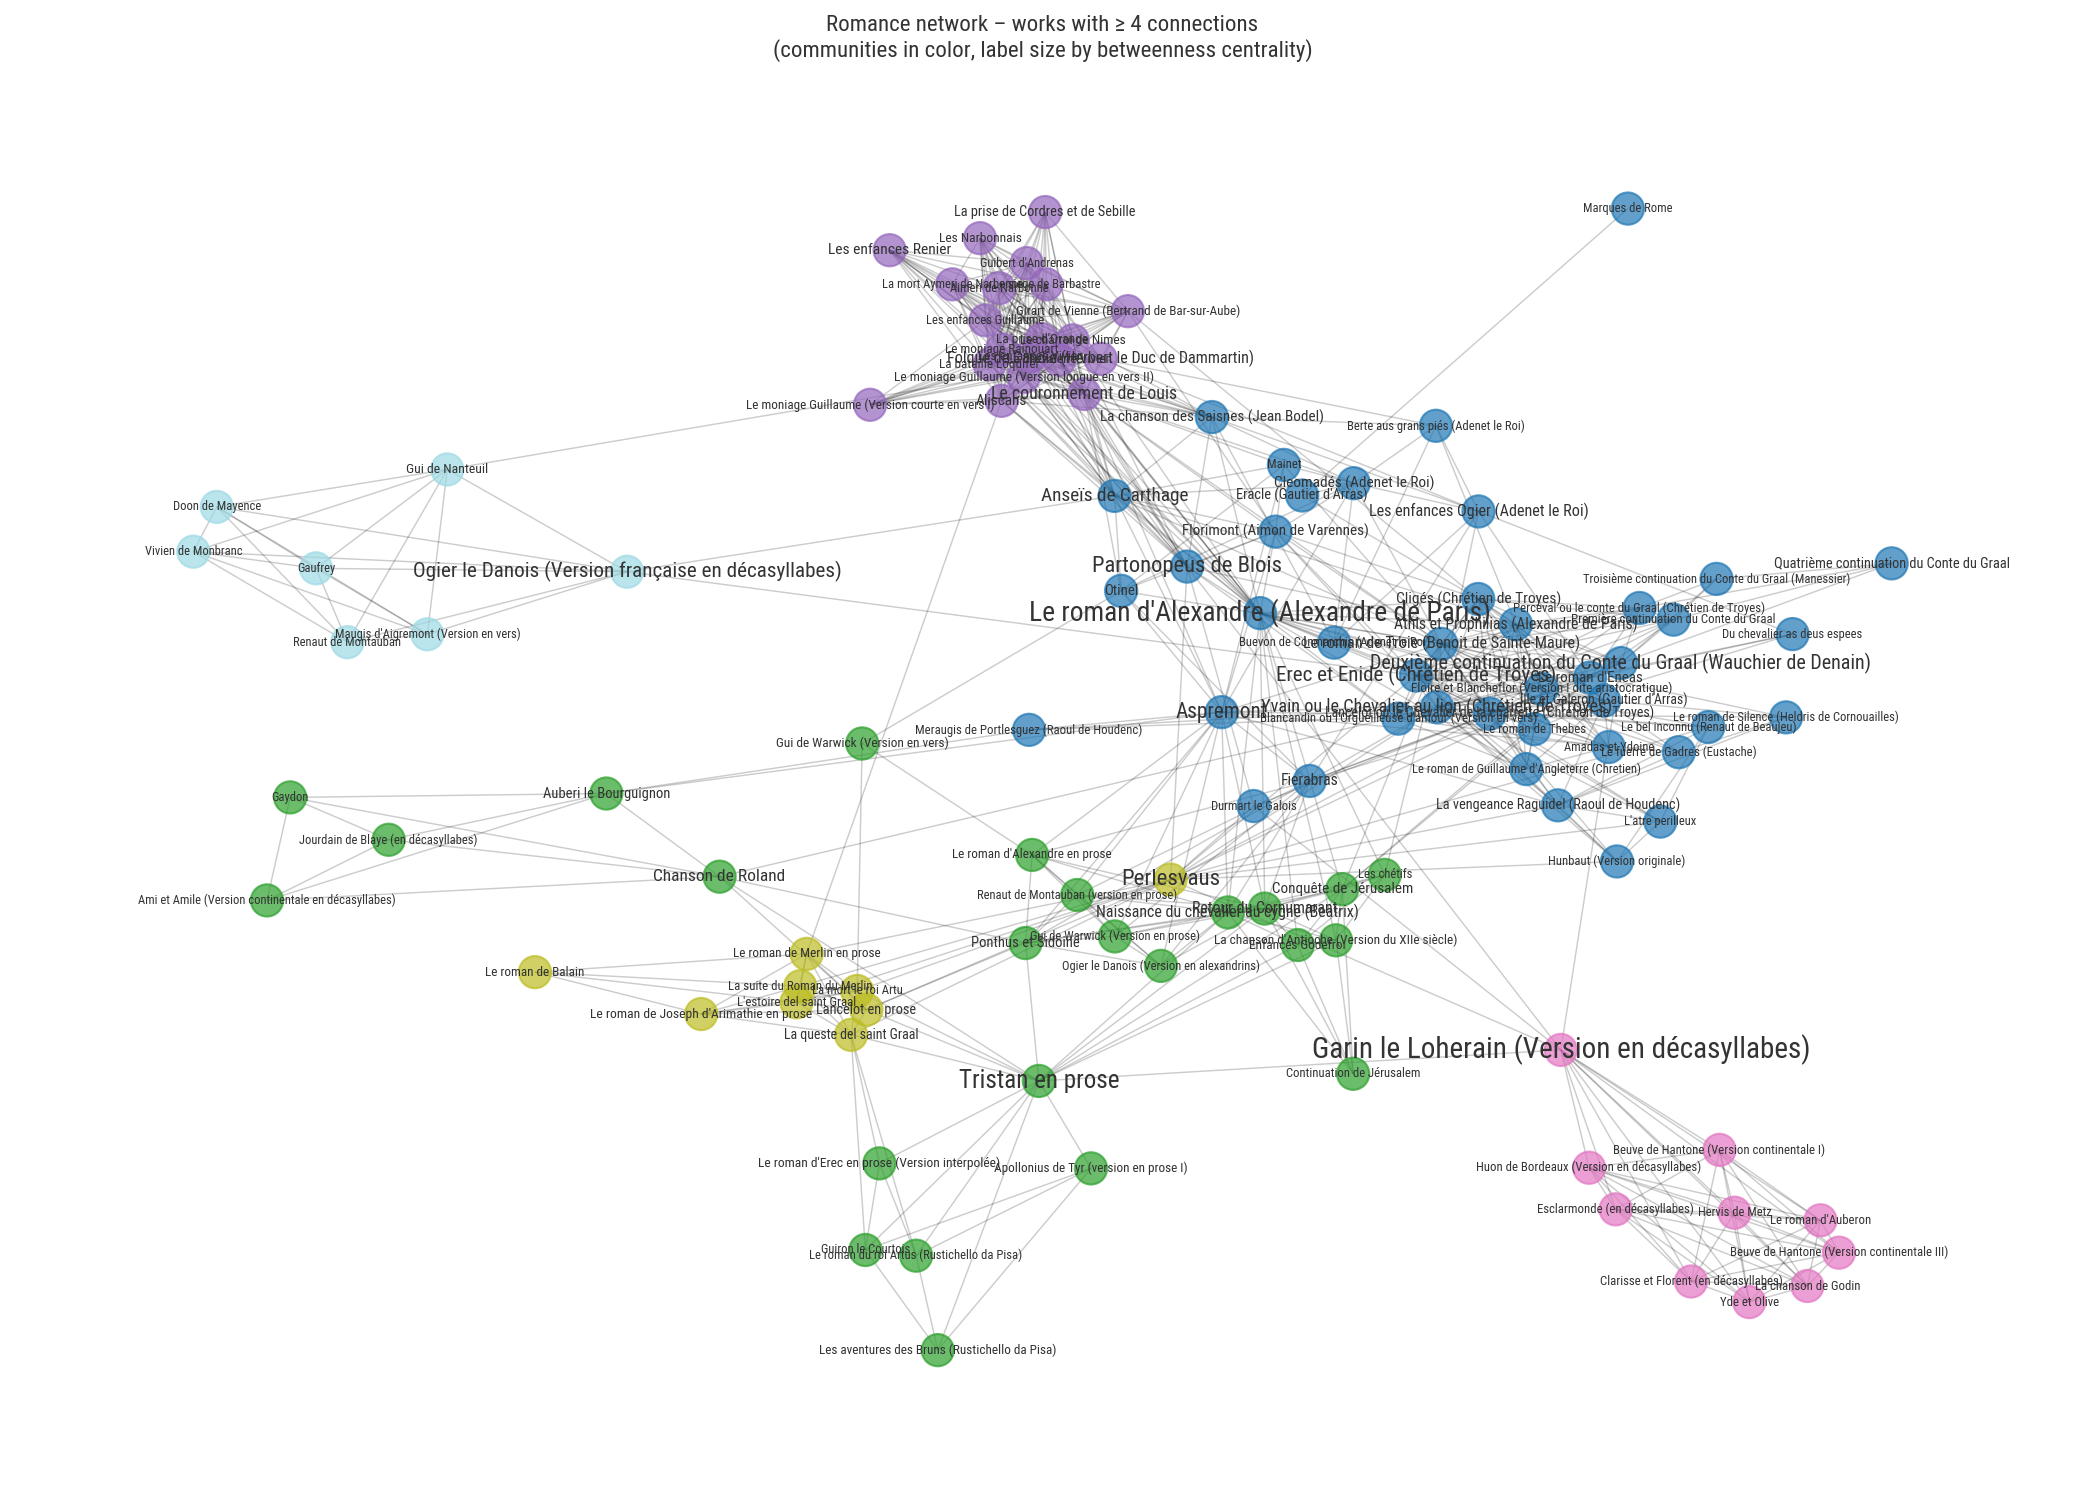

In [12]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

def plot_romance_network(json_path, min_degree=4, figsize=(14, 10), k=2.0, seed=42):
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    nodes = data["nodes"]
    links = data["links"]

    G = nx.Graph()
    for n in nodes:
        G.add_node(n["id"])

    for l in links:
        src = l["source"]
        tgt = l["target"]
        w = l.get("value", 1)
        G.add_edge(src, tgt, weight=w)

    print(f"Total: {G.number_of_nodes()} works, {G.number_of_edges()} connections")

    nodes_filtered = [n for n, d in G.degree() if d >= min_degree]
    G_sub = G.subgraph(nodes_filtered).copy()

    print(f"Filtered (degree >= {min_degree}): {G_sub.number_of_nodes()} works, {G_sub.number_of_edges()} connections")

    communities = list(greedy_modularity_communities(G_sub, weight="weight"))

    cluster_index = {}
    for i, comm in enumerate(communities):
        for n in comm:
            cluster_index[n] = i

    colors = [cluster_index[n] for n in G_sub.nodes()]

    betweenness = nx.betweenness_centrality(G_sub, weight="weight")
    max_betweenness = max(betweenness.values()) if betweenness.values() else 1

    pos = nx.spring_layout(
        G_sub,
        k=k,
        iterations=300,
        weight="weight",
        seed=seed
    )

    grid_color = '#e0e0e0'
    text_color = '#333333'

    fig, ax = plt.subplots(figsize=figsize, dpi=150)
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    nx.draw_networkx_nodes(
        G_sub, pos,
        node_size=240,
        node_color=colors,
        cmap=plt.cm.tab20,
        alpha=0.7,
        ax=ax
    )

    nx.draw_networkx_edges(
        G_sub, pos,
        width=0.7,
        alpha=0.2,
        ax=ax
    )

    for node in G_sub.nodes():
        node_betweenness = betweenness[node]
        font_size = 6 + (node_betweenness / max_betweenness) * 8
        
        nx.draw_networkx_labels(
            G_sub, pos,
            labels={node: node},
            font_size=font_size,
            font_color=text_color,
            ax=ax
        )

    ax.axis("off")
    ax.set_title(f"Romance network – works with ≥ {min_degree} connections\n(communities in color, label size by betweenness centrality)",
                fontsize=11, color=text_color, pad=15, fontweight='normal')

    plt.tight_layout()
    plt.savefig('../figures/romance_network.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    plt.show()

    return G_sub, communities

G_sub, communities = plot_romance_network("../data/clime/french.json", min_degree=4)

Total: 74 works, 170 connections
Filtered (degree >= 2): 49 works, 150 connections


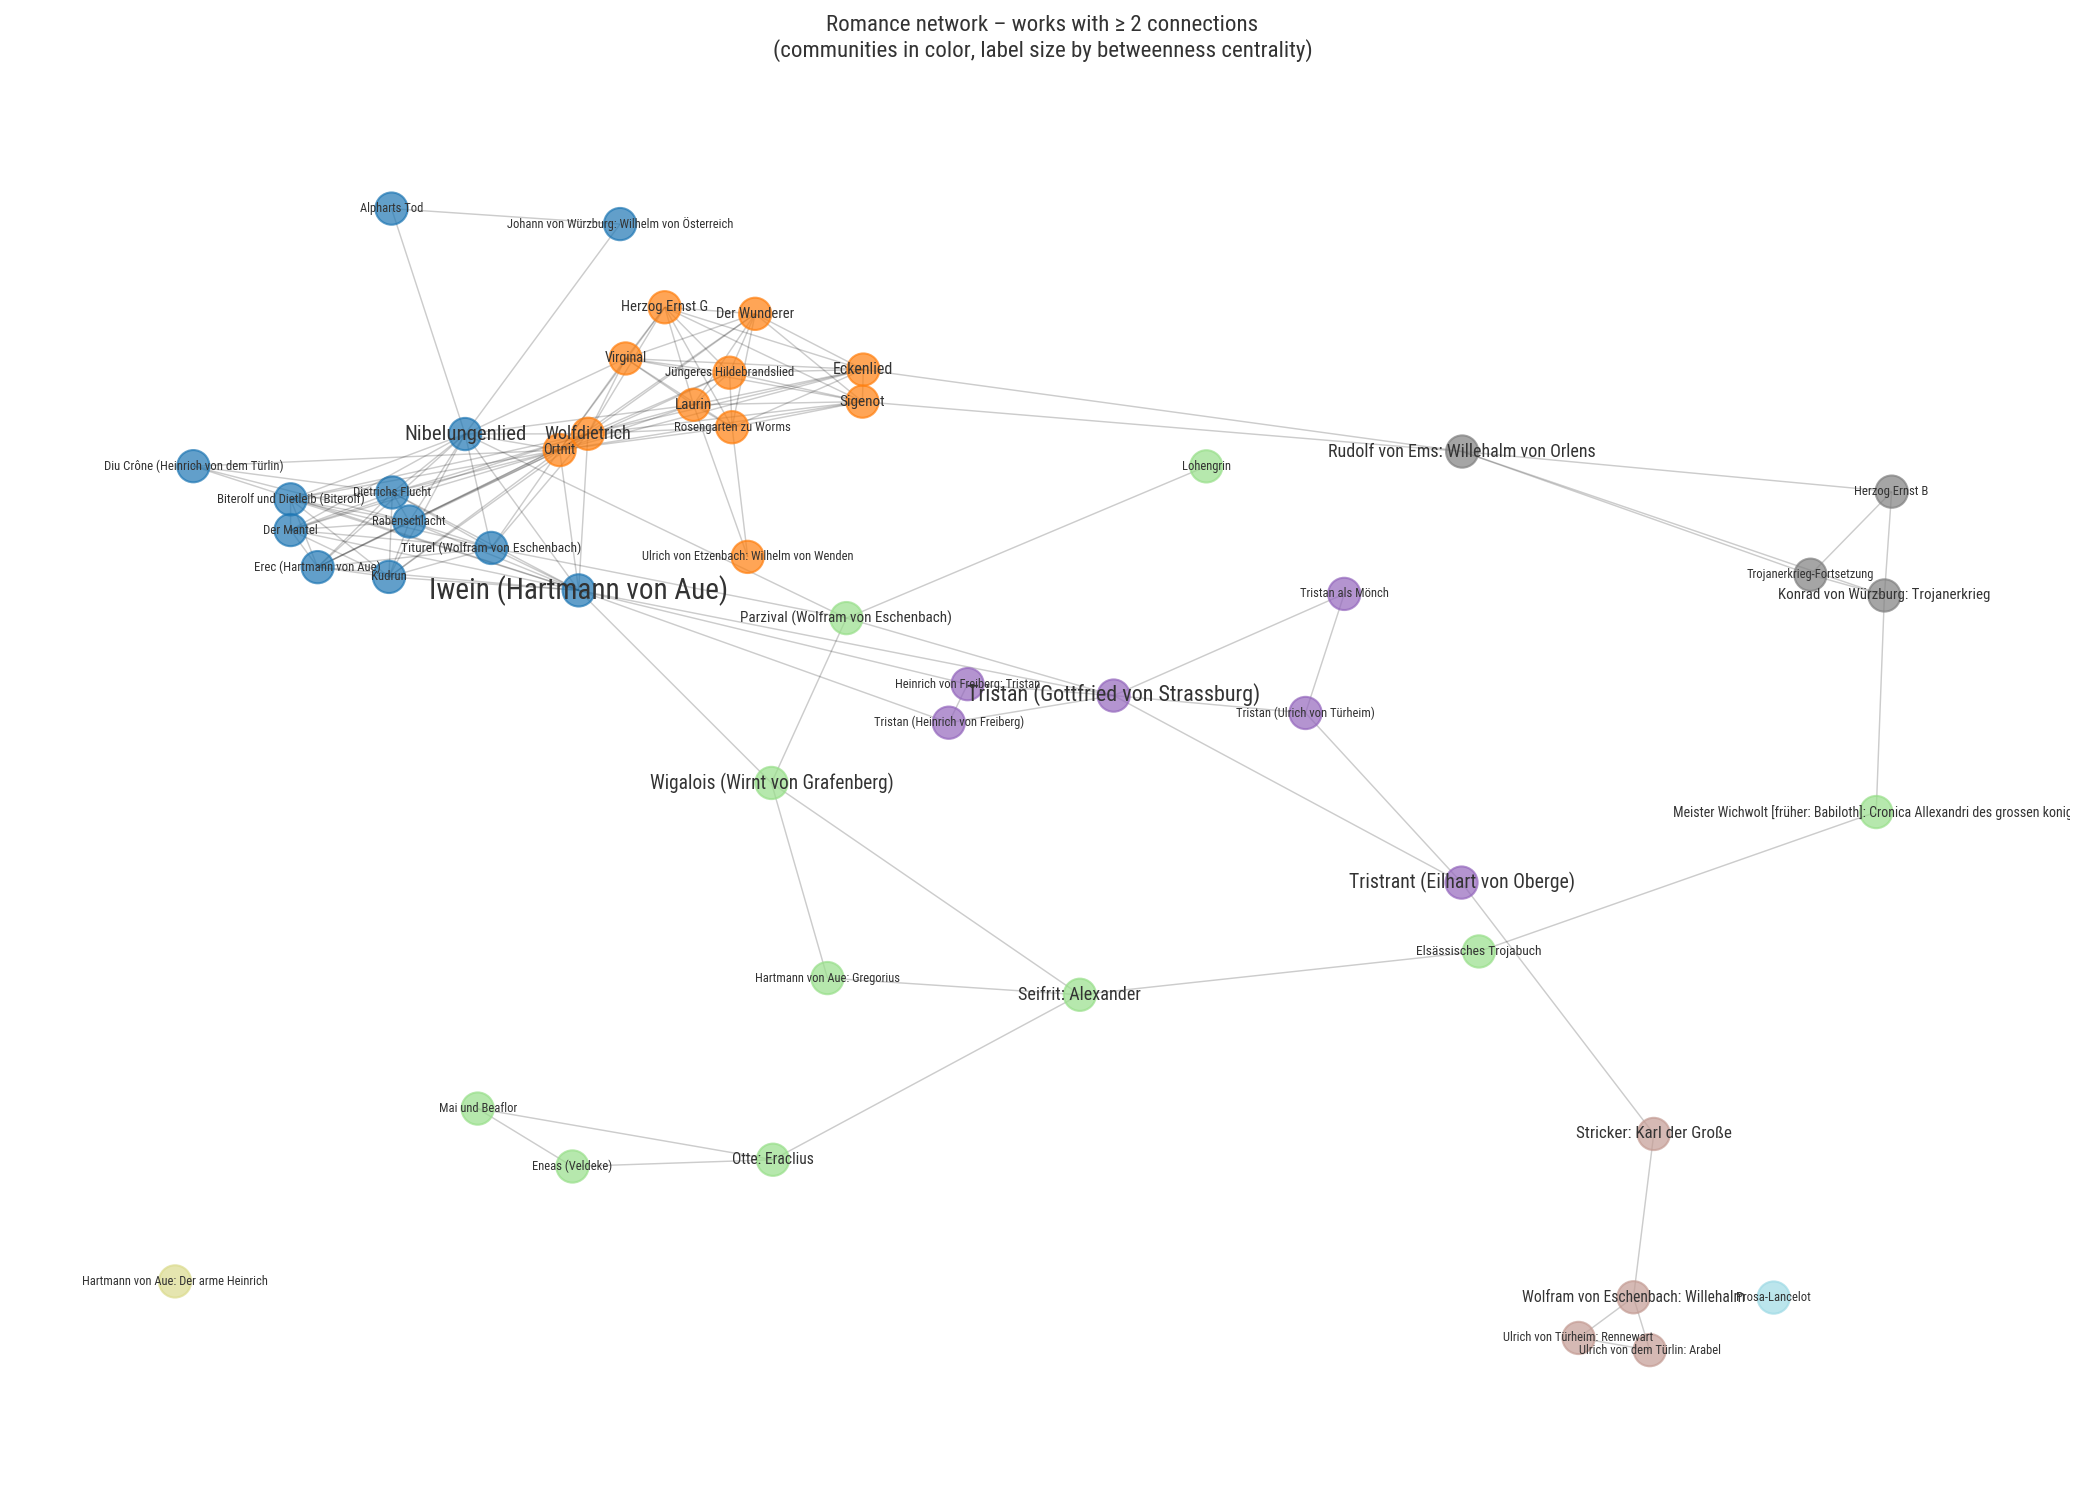

In [13]:
G_sub, communities = plot_romance_network("../data/clime/german.json", min_degree=2)